<a href="https://colab.research.google.com/github/rafaeldsouza/mestrado/blob/main/Redes%20Neurais/KerasMLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemente utilizando a API do scikit-learn um MLP para classificação usando Keras.

A implementação deve lidar dataset binários e multiclasse sem a necessidade de enviar parâmetros indicando qual o tipo da base.

A quantidade de neurônios nas camadas intemediárias e a função de ativação usada nelas deve poder ser passada pelo construtor.


In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.special import expit
from abc import ABC, abstractstaticmethod
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import label_binarize
from abc import ABC, abstractmethod
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import to_categorical



def criaDataset(n=1000, centers=[[0,0],[1,0],[1,1],[0,1]]):
    x,y = make_blobs(n_samples=n,centers=centers,cluster_std=0.2)
    y = np.array(y%2,dtype=int)
    return x,y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)


def plotaHiperplano(X, y, vetor, intercept=0):
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

In [11]:
def define_axes(x):
  min1, max1 = x[:,0].min(), x[:,0].max()
  min2, max2 = x[:,1].min(), x[:,1].max()
  return [min1-.1, max1+.1,min2-.1,max2+.1]

def plotPredictions(clf, x):
  axes = define_axes(x)
  x0s=np.linspace(axes[0], axes[1],100)
  x1s=np.linspace(axes[2], axes[3],100)
  x0,x1 = np.meshgrid(x0s,x1s)
  x=np.c_[x0.ravel(),x1.ravel()]
  ypred = clf.predict(x).reshape(x0.shape)
  plt.contourf(x0,x1,ypred,cmap=plt.cm.brg, alpha=0.2)

def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)


In [9]:
class MLPK(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=[5,4], activation_function='relu', epochs=1000):
        self.n_hidden = n_hidden
        self.activation_function = activation_function
        self.epochs = epochs
    
    def fit(self, X, y):
        self.labels,ids = np.unique(y,return_inverse=True)
        yhot = keras.utils.to_categorical(ids)
        size_last_layer = yhot.shape[1]
        size_first_layer = X.shape[1]
        
        if len(self.n_hidden) > 0:
            model = keras.models.Sequential()
            model.add(layers.InputLayer(input_shape=(size_first_layer,)))
            for idx in range(len(self.n_hidden)):
                value = self.n_hidden[idx]
                model.add(layers.Dense(value, activation=self.activation_function))
            
            model.add(layers.Dense(size_last_layer,activation='softmax'))
            model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])            
            model.fit(X,yhot,epochs=self.epochs,use_multiprocessing=True, verbose=0)
            self.model = model      

    def predict(self, X, y=None):
        a = self.model.predict(X)
        idx = np.argmax(a, axis=1)
        ypred = self.labels[idx]
        return ypred

#Dataset Binários

1.0
0.97


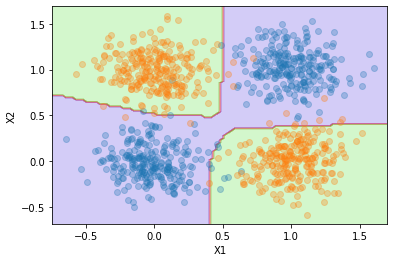

In [16]:
X,y = criaDataset()
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.9)

model = MLPK(n_hidden=[32,16,8], activation_function='relu', epochs=1000)
model.fit(Xtr, ytr)

print(accuracy(ytr, model.predict(Xtr)))
print(accuracy(yte, model.predict(Xte)))
plotadataset(X, y)
plotPredictions(model, Xte)
plt.show()

#Dataset Multiclasse

In [19]:
def criaDataset(n=1000, n_classes=4):
    X,y = make_blobs(n_samples=n,centers=n_classes**2,cluster_std=0.8)
    y = np.array(y%n_classes,dtype=int)
    return X,y

0.91
0.79


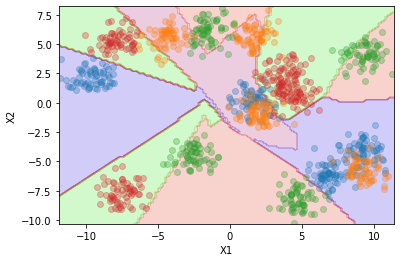

In [27]:
X,y = criaDataset()
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.9)

model = MLPK(n_hidden=[16,8], activation_function='relu', epochs=1000)
model.fit(Xtr, ytr)

print(accuracy(ytr, model.predict(Xtr)))
print(accuracy(yte, model.predict(Xte)))
plotadataset(X, y)
plotPredictions(model, Xte)
plt.show()

0.99
0.8744444444444445


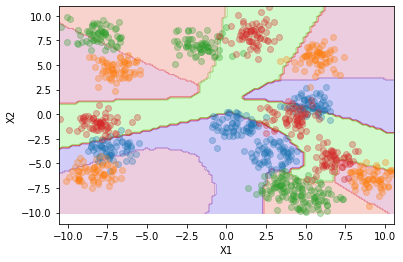

In [31]:
X,y = criaDataset()
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.9)

model = MLPK(n_hidden=[64,64,32,16,8], activation_function='relu', epochs=1000)
model.fit(Xtr, ytr)

print(accuracy(ytr, model.predict(Xtr)))
print(accuracy(yte, model.predict(Xte)))
plotadataset(X, y)
plotPredictions(model, Xte)
plt.show()
